---
title: Lecture 3
subtitle: Color Spaces, Gamma Correction, and Histogram Equilization, Normalization, and Matching
date: 2024-09-04
downloads:
  - file: ../assets/03_lecture.pdf
    title: 03_lecture.pdf
  - file: 03_lecture.ipynb
    title: 03_lecture.ipynb
  - file: ../assets/HistMatching.py
    title: HistMatching.py
---

In [76]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

## Color Spaces

In [2]:
lake_img = cv2.imread('assets/New_Zealand_Lake.jpg', cv2.IMREAD_COLOR)

We can split the colors using the [split](#card-split) function. This gives us 3 monochromatic images. We can then use the [merge](#card-merge) to get the original image.

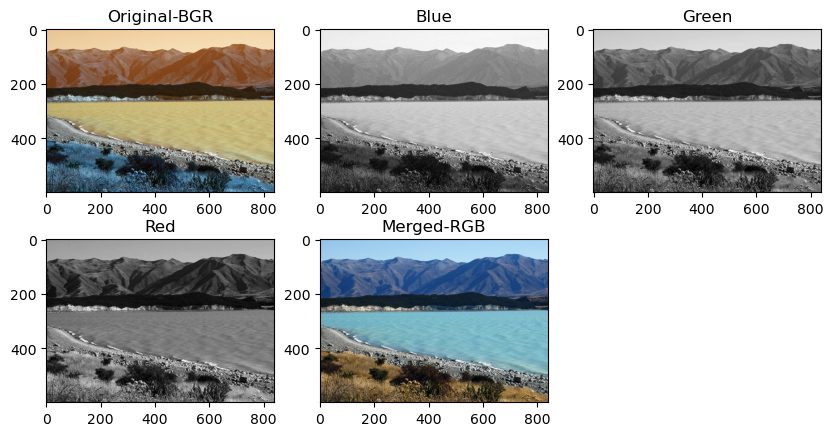

In [5]:
# split the image into their channels
b, g, r = cv2.split(lake_img)

# merge the image back together in RGB format
lake_img_rgb = cv2.merge([r, g, b])

# show the images
plt.figure(figsize=[10, 5])
plt.subplot(231); plt.imshow(lake_img); plt.title("Original-BGR")
plt.subplot(232); plt.imshow(b, cmap="gray", vmin=0, vmax=255); plt.title("Blue")
plt.subplot(233); plt.imshow(g, cmap="gray", vmin=0, vmax=255); plt.title("Green")
plt.subplot(234); plt.imshow(r, cmap="gray", vmin=0, vmax=255); plt.title("Red")
plt.subplot(235); plt.imshow(lake_img_rgb, vmin=0, vmax=255); plt.title("Merged-RGB")
plt.show()

We could have also used the [cvtColor](#card-cvtColor) function to do the BGR to RGB conversion.

In [6]:
lake_img_rgb = cv2.cvtColor(lake_img, cv2.COLOR_BGR2RGB)

cvtColor allows us to convert the image to other color spaces, like HSV.

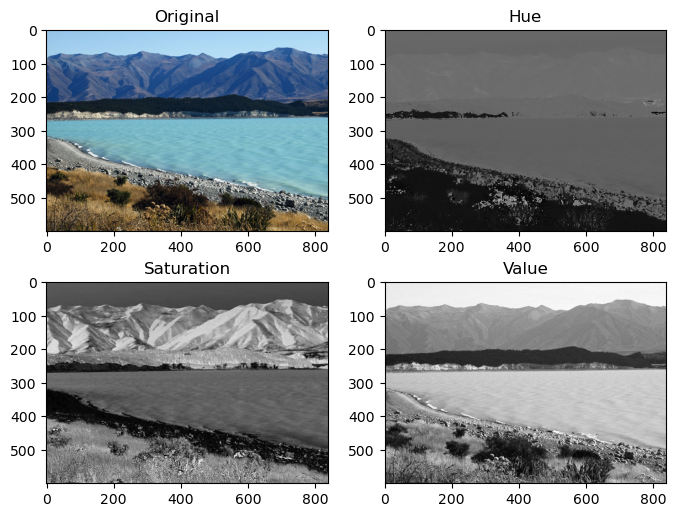

In [11]:
# convert the original image to hsv
lake_img_hsv = cv2.cvtColor(lake_img, cv2.COLOR_BGR2HSV)

# split the channels
h, s, v = cv2.split(lake_img_hsv)

# show the images
plt.figure(figsize=[8, 6])
plt.subplot(221); plt.imshow(lake_img_rgb); plt.title('Original')
plt.subplot(222); plt.imshow(h, cmap='gray', vmin=0, vmax=255); plt.title('Hue')
plt.subplot(223); plt.imshow(s, cmap='gray', vmin=0, vmax=255); plt.title('Saturation')
plt.subplot(224); plt.imshow(v, cmap='gray', vmin=0, vmax=255); plt.title('Value')
plt.show()

To modify colors in an image we need to:
1. Convert to the color scheme in which we will modify
2. Modify the image in the correct third dimension entry
3. Convert to RGB so the [imshow](#card-imshow) will work correctly

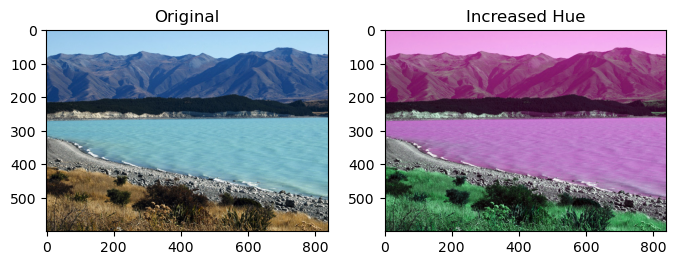

In [12]:
# make a copy since we'll be modifying the image in place
lake_img_hsv_mod = lake_img_hsv.copy()

# change the hue value in all the pixels
lake_img_hsv_mod[:,:,0] += 50

# convert the modified image to RGB
lake_img_mod = cv2.cvtColor(lake_img_hsv_mod, cv2.COLOR_HSV2RGB)

# show the images
plt.figure(figsize=[8, 5])
plt.subplot(121); plt.imshow(lake_img_rgb); plt.title('Original')
plt.subplot(122); plt.imshow(lake_img_mod, cmap='gray', vmin=0, vmax=255); plt.title('Increased Hue')
plt.show()

::::{tip}
The `+=` is an augmented assignment operator. It modifies the value in place and is short hand for `x = x + value`. For example:

:::{code} python
x = 3
x += 2
print(x) # output is 5
:::

The line `lake_image_hsv[:,:,0]+=50` takes the hue channel of the all the rows and columns of the image, and adds 50 to each value. If the assignment were `lake_image_hsv[:,:,0] = 50` it would set all the values to 50.
::::

## Gamma Correction

Gamma correction corrects for your eyes not sensing intensity linearly.

$$
\begin{equation*}
\mathrm{img}_{\mathrm{new}} = \mathrm{img}^{1/\gamma}
\end{equation*}
$$

If $\gamma < 1$ the image intensity decreases, $\gamma = 1$ the image intensity is not changed, and $\gamma > 1$ the image intensity increases.

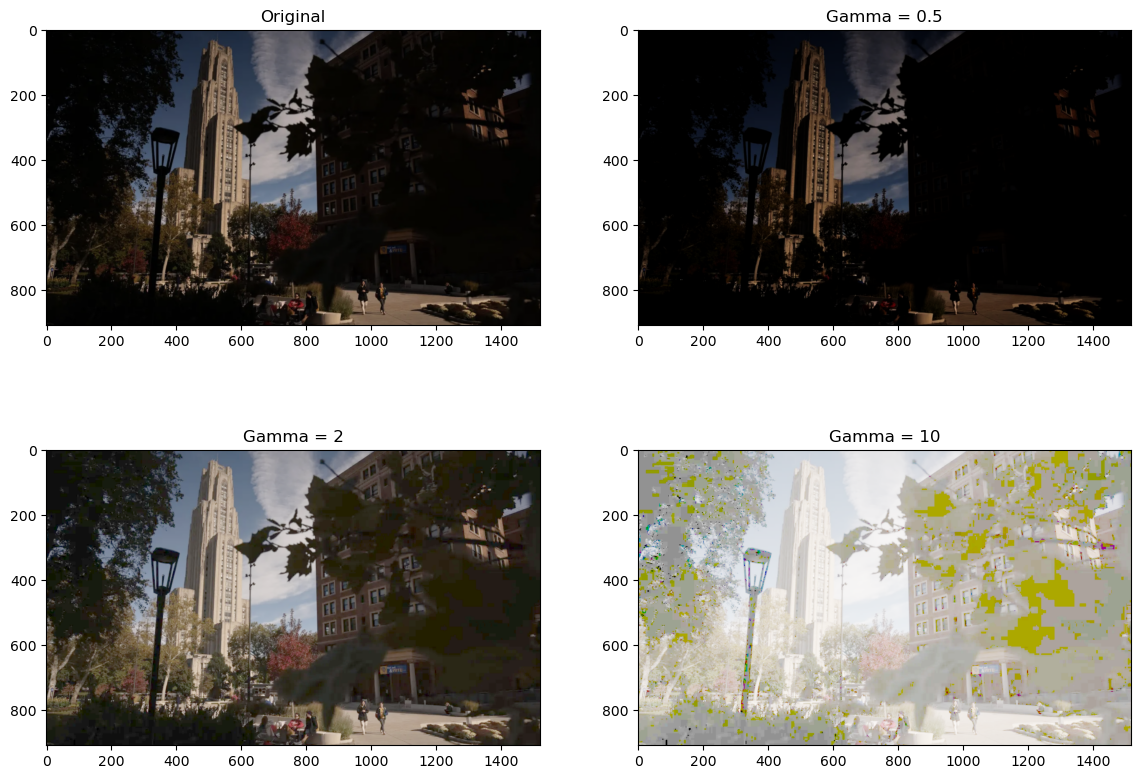

In [79]:
# read the images
campus_img = cv2.imread(os.path.relpath('assets/PittCampus_BadContrast.png'), cv2.IMREAD_COLOR)

# convert the images
campus_img_gray = cv2.cvtColor(campus_img, cv2.COLOR_BGR2GRAY)
campus_img_rgb = cv2.cvtColor(campus_img, cv2.COLOR_BGR2RGB)

# gamma correction function
def gamma_correct(img, gamma):
    norm_img = img / 255.0
    correct_img = np.power(norm_img, 1 / gamma)
    correct_img = np.uint8(correct_img * 255)
    return correct_img

# apply various gamma corrections
campus_img_gp5 = gamma_correct(campus_img_rgb, 0.5)
campus_img_g2 = gamma_correct(campus_img_rgb, 2)
campus_img_g10 = gamma_correct(campus_img_rgb, 10)

# show the images
plt.figure(figsize=[14, 10])
plt.subplot(221); plt.imshow(campus_img_rgb); plt.title('Original')
plt.subplot(222); plt.imshow(campus_img_gp5); plt.title('Gamma = 0.5')
plt.subplot(223); plt.imshow(campus_img_g2); plt.title('Gamma = 2')
plt.subplot(224); plt.imshow(campus_img_g10); plt.title('Gamma = 10')
plt.show()

## Histogram Equilization

Histogram equilization remaps the image histogram such that the distribution is uniform. We can use the function [equalizeHist](#card-equalizeHist) to accomplish this.

:::{note}
equalizeHist only operates on grayscale images.
:::

### Example

Consider the following images and their image histograms. The equalized image has superior contrast.

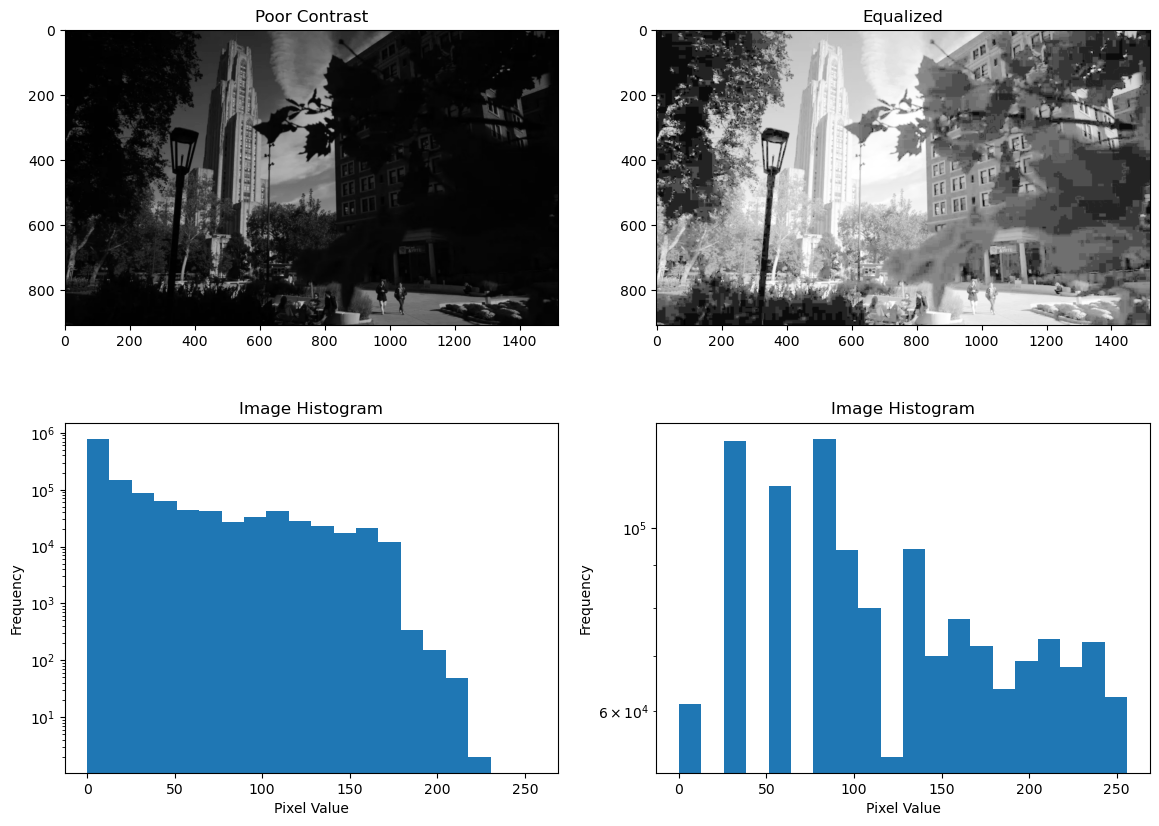

In [73]:
# equalize the image
campus_img_equalized = cv2.equalizeHist(campus_img_gray)

# show the images
plt.figure(figsize=[14, 10])
plt.subplot(221); plt.imshow(campus_img_gray, cmap='gray', vmin=0, vmax=255); plt.title('Poor Contrast')
plt.subplot(222); plt.imshow(campus_img_equalized, cmap='gray', vmin=0, vmax=255); plt.title('Equalized')

plt.subplot(223)
plt.hist(campus_img_gray.ravel(), 20, [0,256])
plt.yscale('log')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Image Histogram')

plt.subplot(224)
plt.hist(campus_img_equalized.ravel(), 20, [0,256])
plt.yscale('log')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()

## Histogram Normalization

Histogram normalization makes sure that the full range of the image is used (i.e., 0-255). We can accomplish this with the [normalize](#card-normalize) function in Python.

:::{warning}
The image will actually look the same in imshow because the function automatically normalizes the range for display unless you provide the additional vmin/vmax inputs.
:::

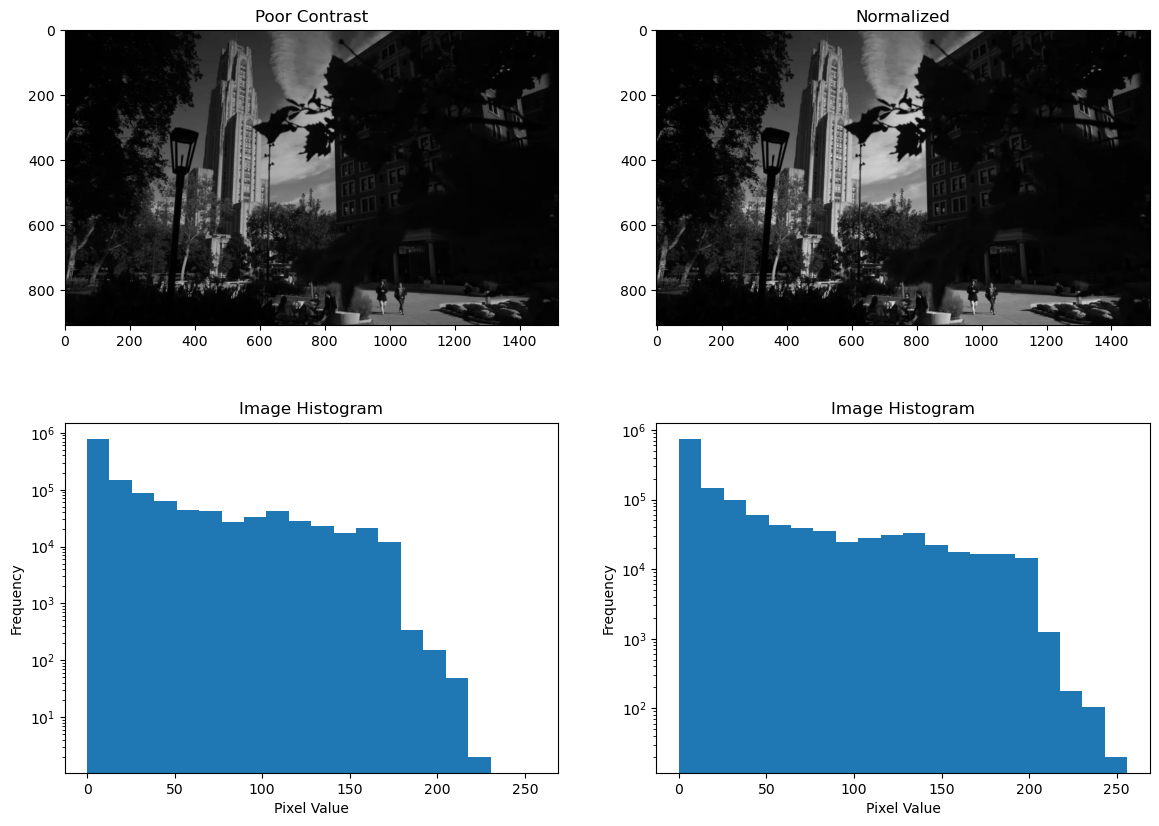

In [74]:
# normalize the image
campus_img_norm = cv2.normalize(campus_img_gray, None, 0, 255, cv2.NORM_MINMAX)

# show the images
plt.figure(figsize=[14, 10])
plt.subplot(221); plt.imshow(campus_img_gray, cmap='gray', vmin=0, vmax=255); plt.title('Poor Contrast')
plt.subplot(222); plt.imshow(campus_img_norm, cmap='gray', vmin=0, vmax=255); plt.title('Normalized')

plt.subplot(223)
plt.hist(campus_img_gray.ravel(), 20, [0,256])
plt.yscale('log')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Image Histogram')

plt.subplot(224)
plt.hist(campus_img_norm.ravel(), 20, [0,256])
plt.yscale('log')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Image Histogram')
plt.show()

## Histogram Matching